In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from distutils.version import StrictVersion

In [5]:
import sklearn

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

sklearn.__version__

'0.18.1'

In [6]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

assert StrictVersion(tf.__version__) >= StrictVersion('1.1.0')

tf.__version__

'1.1.0'

In [7]:
import keras

assert StrictVersion(keras.__version__) >= StrictVersion('2.0.0')

keras.__version__

Using TensorFlow backend.


'2.0.2'

## Trainingsdaten Laden und aufbereiten

In [8]:
!curl -O https://raw.githubusercontent.com/DJCordhose/speed-limit-signs/master/data/speed-limit-signs.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1810k  100 1810k    0     0  3166k      0 --:--:-- --:--:-- --:--:-- 3164k


In [9]:
# https://docs.python.org/3/library/zipfile.html
from zipfile import ZipFile
zip = ZipFile(r'speed-limit-signs.zip')
zip.extractall('.')

In [73]:
!ls -l speed-limit-signs

total 28
drwxr-xr-x 2 nbuser nbuser 4096 Jul  4 07:06 0
drwxr-xr-x 2 nbuser nbuser 4096 Jul  4 07:06 1
drwxr-xr-x 2 nbuser nbuser 4096 Jul  4 07:06 2
drwxr-xr-x 2 nbuser nbuser 4096 Jul  4 07:06 3
drwxr-xr-x 2 nbuser nbuser 4096 Jul  4 07:06 4
drwxr-xr-x 2 nbuser nbuser 4096 Jul  4 07:06 5
-rw-r--r-- 1 nbuser nbuser  380 Jul  4 08:50 README.md


In [74]:
!cat speed-limit-signs/README.md

Data extracted from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

From http://benchmark.ini.rub.de/Dataset_GTSDB/FullIJCNN2013.zip just the samples for the speed limit signs 

## Format

https://en.wikipedia.org/wiki/Netpbm_format

Can be previewed on a Mac and be processed by http://scikit-image.org/

## Labels
- 0: 30
- 1: 50
- 2: 70
- 3: 80
- 4: 100
- 5: 120

In [76]:
!ls speed-limit-signs/0

00000.ppm  00012.ppm  00024.ppm  00036.ppm  00048.ppm  00060.ppm  00072.ppm
00001.ppm  00013.ppm  00025.ppm  00037.ppm  00049.ppm  00061.ppm  00073.ppm
00002.ppm  00014.ppm  00026.ppm  00038.ppm  00050.ppm  00062.ppm  00074.ppm
00003.ppm  00015.ppm  00027.ppm  00039.ppm  00051.ppm  00063.ppm  00075.ppm
00004.ppm  00016.ppm  00028.ppm  00040.ppm  00052.ppm  00064.ppm  00076.ppm
00005.ppm  00017.ppm  00029.ppm  00041.ppm  00053.ppm  00065.ppm  00077.ppm
00006.ppm  00018.ppm  00030.ppm  00042.ppm  00054.ppm  00066.ppm  00078.ppm
00007.ppm  00019.ppm  00031.ppm  00043.ppm  00055.ppm  00067.ppm
00008.ppm  00020.ppm  00032.ppm  00044.ppm  00056.ppm  00068.ppm
00009.ppm  00021.ppm  00033.ppm  00045.ppm  00057.ppm  00069.ppm
00010.ppm  00022.ppm  00034.ppm  00046.ppm  00058.ppm  00070.ppm
00011.ppm  00023.ppm  00035.ppm  00047.ppm  00059.ppm  00071.ppm


In [11]:
!cp speed-limit-signs/0/00000.ppm speed-limit-signs/0/aha.bmp

In [6]:
!ls speed-limit-signs/0

00000.ppm  00012.ppm  00024.ppm  00036.ppm  00048.ppm  00060.ppm  00072.ppm
00001.ppm  00013.ppm  00025.ppm  00037.ppm  00049.ppm  00061.ppm  00073.ppm
00002.ppm  00014.ppm  00026.ppm  00038.ppm  00050.ppm  00062.ppm  00074.ppm
00003.ppm  00015.ppm  00027.ppm  00039.ppm  00051.ppm  00063.ppm  00075.ppm
00004.ppm  00016.ppm  00028.ppm  00040.ppm  00052.ppm  00064.ppm  00076.ppm
00005.ppm  00017.ppm  00029.ppm  00041.ppm  00053.ppm  00065.ppm  00077.ppm
00006.ppm  00018.ppm  00030.ppm  00042.ppm  00054.ppm  00066.ppm  00078.ppm
00007.ppm  00019.ppm  00031.ppm  00043.ppm  00055.ppm  00067.ppm  aha.bpm
00008.ppm  00020.ppm  00032.ppm  00044.ppm  00056.ppm  00068.ppm
00009.ppm  00021.ppm  00033.ppm  00045.ppm  00057.ppm  00069.ppm
00010.ppm  00022.ppm  00034.ppm  00046.ppm  00058.ppm  00070.ppm
00011.ppm  00023.ppm  00035.ppm  00047.ppm  00059.ppm  00071.ppm


In [13]:
import os
import skimage.data

def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            image = skimage.data.imread(f)
            images.append(image)
            labels.append(int(d))
    return images, labels

In [14]:
# Load datasets.
ROOT_PATH = "./"
data_dir = os.path.join(ROOT_PATH, "speed-limit-signs")

images, labels = load_data(data_dir)

In [15]:
import matplotlib
import matplotlib.pyplot as plt

def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

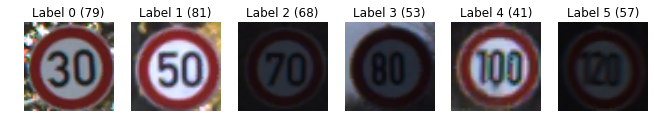

In [16]:
display_images_and_labels(images, labels)

In [17]:
for image in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (39, 39, 3), min: 5, max: 182
shape: (38, 33, 3), min: 8, max: 135
shape: (51, 51, 3), min: 0, max: 139
shape: (22, 22, 3), min: 20, max: 104
shape: (36, 36, 3), min: 14, max: 115


In [18]:
import skimage.transform

# Resize images
images64 = [skimage.transform.resize(image, (64, 64))
                for image in images]

In [19]:
for image in images64[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (64, 64, 3), min: 0.02852759267769634, max: 0.7088725968903188
shape: (64, 64, 3), min: 0.04503867953431377, max: 0.5090035232843136
shape: (64, 64, 3), min: 0.021373554304534022, max: 0.5219965916053921
shape: (64, 64, 3), min: 0.0784313725490196, max: 0.3929792815563721
shape: (64, 64, 3), min: 0.054901960784313725, max: 0.4287875306372557


## Data Augmentation

* https://keras.io/preprocessing/image/
* https://datascience.stackexchange.com/questions/5224/how-to-prepare-augment-images-for-neural-network
* http://machinelearningmastery.com/image-augmentation-deep-learning-keras/

In [20]:
import numpy as np

y = np.array(labels)
X = np.array(images64)
y.shape, X.shape

((379,), (379, 64, 64, 3))

In [21]:
from keras.utils.np_utils import to_categorical

num_categories = 6

y = to_categorical(y, num_categories)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [16]:
train_dir = 'speed-limit-signs'
generated_train_dir = 'generated'

In [17]:
mkdir generated

In [9]:
datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=25,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.5,
horizontal_flip=False,
vertical_flip=False,    
fill_mode='nearest')

In [18]:
datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),
        batch_size=32,
        save_to_dir=generated_train_dir
)

Found 1 images belonging to 6 classes.


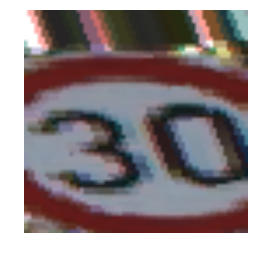

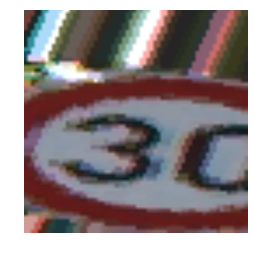

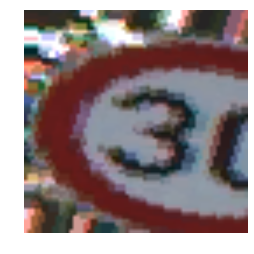

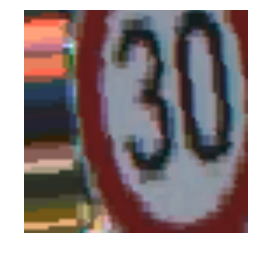

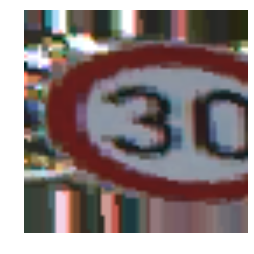

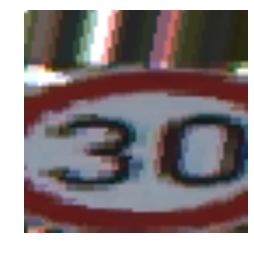

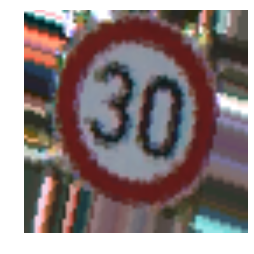

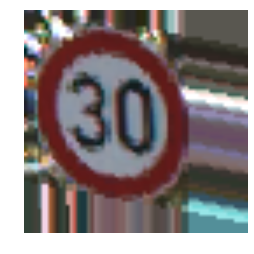

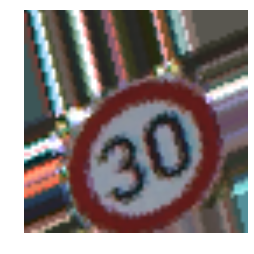

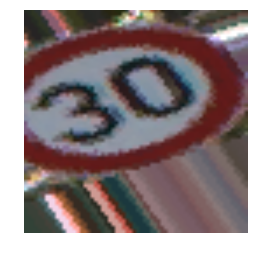

In [39]:
train_dir = 'speed-limit-signs/0'

import os
from keras.preprocessing import image
import matplotlib
import matplotlib.pyplot as plt

number_of_transformations = 10

fnames = [os.path.join(train_dir, fname) for fname in os.listdir(train_dir)]

img_path = fnames[0] # We pick one image to "augment"

img = image.load_img(img_path, target_size=(64, 64)) # Read the image and resize it

x = image.img_to_array(img) # Convert it to a Numpy array with shape (64, 64, 3)

x = x.reshape((1,) + x.shape) # Reshape it to (1, 64, 64, 3)

# plt.figure(figsize=(15, 15))

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 1
for batch in datagen.flow(x):
    plt.figure(i)
#     pillow image: http://pillow.readthedocs.io/en/3.4.x/reference/Image.html
    img = image.array_to_img(batch[0])
    fname = 'generated/aha_{index}.png'.format(index=i)
    img.save(fname)
    plt.imshow(img)
#     plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
    plt.axis('off')
    if i % number_of_transformations == 0:
        break
    i += 1
plt.show()

In [40]:
!ls -l generated/

total 120
-rw-r--r-- 1 nbuser nbuser 2027 Jul  4 09:18 aha_1.jpg
-rw-r--r-- 1 nbuser nbuser 5887 Jul  4 09:19 aha_1.png
-rw-r--r-- 1 nbuser nbuser 2119 Jul  4 09:18 aha_10.jpg
-rw-r--r-- 1 nbuser nbuser 6948 Jul  4 09:19 aha_10.png
-rw-r--r-- 1 nbuser nbuser 1962 Jul  4 09:18 aha_2.jpg
-rw-r--r-- 1 nbuser nbuser 5385 Jul  4 09:19 aha_2.png
-rw-r--r-- 1 nbuser nbuser 1998 Jul  4 09:18 aha_3.jpg
-rw-r--r-- 1 nbuser nbuser 6770 Jul  4 09:19 aha_3.png
-rw-r--r-- 1 nbuser nbuser 1722 Jul  4 09:18 aha_4.jpg
-rw-r--r-- 1 nbuser nbuser 4889 Jul  4 09:19 aha_4.png
-rw-r--r-- 1 nbuser nbuser 1911 Jul  4 09:18 aha_5.jpg
-rw-r--r-- 1 nbuser nbuser 5752 Jul  4 09:19 aha_5.png
-rw-r--r-- 1 nbuser nbuser 2094 Jul  4 09:18 aha_6.jpg
-rw-r--r-- 1 nbuser nbuser 4846 Jul  4 09:19 aha_6.png
-rw-r--r-- 1 nbuser nbuser 2032 Jul  4 09:18 aha_7.jpg
-rw-r--r-- 1 nbuser nbuser 7600 Jul  4 09:19 aha_7.png
-rw-r--r-- 1 nbuser nbuser 1717 Jul  4 09:18 aha_8.jpg
-rw-r--r-- 1 nbuser nbuser 6307 Jul  4 09:19 aha_8.pn

In [26]:
ROOT_PATH = "./"
data_dir = os.path.join(ROOT_PATH, "speed-limit-signs")
from os.path import basename

directories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
for d in directories:
    label_dir = os.path.join(data_dir, d)
    print(label_dir)
    print(int(d))
    file_names = [f for f in os.listdir(label_dir) if f.endswith(".ppm")]
    for f in file_names:
#         print (f)
        path = os.path.join(label_dir, f)
        print (path)
        print (os.path.splitext(f)[0])

./speed-limit-signs/0
0
./speed-limit-signs/0/00044.ppm
00044
./speed-limit-signs/0/00059.ppm
00059
./speed-limit-signs/0/00054.ppm
00054
./speed-limit-signs/0/00052.ppm
00052
./speed-limit-signs/0/00047.ppm
00047
./speed-limit-signs/0/00018.ppm
00018
./speed-limit-signs/0/00063.ppm
00063
./speed-limit-signs/0/00009.ppm
00009
./speed-limit-signs/0/00025.ppm
00025
./speed-limit-signs/0/00021.ppm
00021
./speed-limit-signs/0/00004.ppm
00004
./speed-limit-signs/0/00023.ppm
00023
./speed-limit-signs/0/00012.ppm
00012
./speed-limit-signs/0/00058.ppm
00058
./speed-limit-signs/0/00045.ppm
00045
./speed-limit-signs/0/00003.ppm
00003
./speed-limit-signs/0/00011.ppm
00011
./speed-limit-signs/0/00017.ppm
00017
./speed-limit-signs/0/00048.ppm
00048
./speed-limit-signs/0/00013.ppm
00013
./speed-limit-signs/0/00032.ppm
00032
./speed-limit-signs/0/00061.ppm
00061
./speed-limit-signs/0/00034.ppm
00034
./speed-limit-signs/0/00050.ppm
00050
./speed-limit-signs/0/00010.ppm
00010
./speed-limit-signs/0/0001

In [19]:
import os

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import matplotlib
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=False,
    vertical_flip=False,    
    fill_mode='nearest')

def augment_image(input_path, output_dir, output_name, number_of_transformations=10, plot=False):
    img = image.load_img(input_path, target_size=(64, 64))
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape) # Reshape it to (1, 64, 64, 3)
    i = 1
    for batch in datagen.flow(x):
        if plot:
            plt.figure(i)
    #     pillow image: http://pillow.readthedocs.io/en/3.4.x/reference/Image.html
        img = image.array_to_img(batch[0])
        if plot:
            plt.imshow(img)
    #     plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
            plt.axis('off')
        else:
            output_path = '{dir}/{name}_{index}.png'.format(index=i, dir=output_dir, name=output_name)
            img.save(output_path)

        if i % number_of_transformations == 0:
            break
        i += 1
    if plot:
        plt.show()

In [20]:
augment_image('./speed-limit-signs/3/00052.ppm', './generated', '00052')

In [18]:
!mkdir generated

In [21]:
ls -l generated/

total 80
-rw-r--r-- 1 nbuser nbuser 6378 Jul  4 12:01 00052_1.png
-rw-r--r-- 1 nbuser nbuser 7143 Jul  4 12:01 00052_10.png
-rw-r--r-- 1 nbuser nbuser 4984 Jul  4 12:01 00052_2.png
-rw-r--r-- 1 nbuser nbuser 6817 Jul  4 12:01 00052_3.png
-rw-r--r-- 1 nbuser nbuser 6075 Jul  4 12:01 00052_4.png
-rw-r--r-- 1 nbuser nbuser 5684 Jul  4 12:01 00052_5.png
-rw-r--r-- 1 nbuser nbuser 6335 Jul  4 12:01 00052_6.png
-rw-r--r-- 1 nbuser nbuser 5986 Jul  4 12:01 00052_7.png
-rw-r--r-- 1 nbuser nbuser 4740 Jul  4 12:01 00052_8.png
-rw-r--r-- 1 nbuser nbuser 6627 Jul  4 12:01 00052_9.png


In [42]:
def traverse(root_dir, 
             category_callback=lambda category_dir, category: print(category_dir, category),
             image_callback=lambda path, directory, basename: print(path, directory, basename)):
    directories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        category_callback(label_dir, d)
        file_names = [f for f in os.listdir(label_dir) if f.endswith(".ppm")]
        for f in file_names:
            path = os.path.join(label_dir, f)
            basename = os.path.splitext(f)[0]
            image_callback(path, d, basename)

In [43]:
ROOT_PATH = "./"
data_dir = os.path.join(ROOT_PATH, "speed-limit-signs")
traverse(data_dir)

./speed-limit-signs/0 0
./speed-limit-signs/0/00044.ppm 0 00044
./speed-limit-signs/0/00059.ppm 0 00059
./speed-limit-signs/0/00054.ppm 0 00054
./speed-limit-signs/0/00052.ppm 0 00052
./speed-limit-signs/0/00047.ppm 0 00047
./speed-limit-signs/0/00018.ppm 0 00018
./speed-limit-signs/0/00063.ppm 0 00063
./speed-limit-signs/0/00009.ppm 0 00009
./speed-limit-signs/0/00025.ppm 0 00025
./speed-limit-signs/0/00021.ppm 0 00021
./speed-limit-signs/0/00004.ppm 0 00004
./speed-limit-signs/0/00023.ppm 0 00023
./speed-limit-signs/0/00012.ppm 0 00012
./speed-limit-signs/0/00058.ppm 0 00058
./speed-limit-signs/0/00045.ppm 0 00045
./speed-limit-signs/0/00003.ppm 0 00003
./speed-limit-signs/0/00011.ppm 0 00011
./speed-limit-signs/0/00017.ppm 0 00017
./speed-limit-signs/0/00048.ppm 0 00048
./speed-limit-signs/0/00013.ppm 0 00013
./speed-limit-signs/0/00032.ppm 0 00032
./speed-limit-signs/0/00061.ppm 0 00061
./speed-limit-signs/0/00034.ppm 0 00034
./speed-limit-signs/0/00050.ppm 0 00050
./speed-limit-si

In [65]:
!rm -r generated/
!mkdir generated
generated_train_dir = 'generated'
ROOT_PATH = "./"
data_dir = os.path.join(ROOT_PATH, "speed-limit-signs")

traverse(data_dir, 
         category_callback=lambda category_dir, category: os.makedirs(os.path.join(generated_train_dir, category)) if not os.path.exists(os.path.join(generated_train_dir, category)) else None,
         image_callback=lambda path, category, basename: augment_image(path, os.path.join(generated_train_dir, category), basename)
        )

In [62]:
!ls -l

total 1824
drwxr-xr-x 3 nbuser nbuser    4096 Jul  4 11:57 __MACOSX
lrwxrwxrwx 1 nbuser nbuser      28 Jul  4 11:00 anaconda2_410 -> /home/nbcommon/anaconda2_410
lrwxrwxrwx 1 nbuser nbuser      28 Jul  4 11:00 anaconda3_410 -> /home/nbcommon/anaconda3_410
lrwxrwxrwx 1 nbuser nbuser      28 Jul  4 11:00 anaconda3_431 -> /home/nbcommon/anaconda3_431
drwxr-xr-x 8 nbuser nbuser    4096 Jul  4 13:14 generated
drwxr-xr-x 8 nbuser nbuser    4096 Jul  4 11:57 speed-limit-signs
-rw-r--r-- 1 nbuser nbuser 1853545 Jul  4 11:57 speed-limit-signs.zip


In [45]:
!rm -r generated/

In [46]:
ls -l

total 1820
drwxr-xr-x 3 nbuser nbuser    4096 Jul  4 11:57 __MACOSX/
lrwxrwxrwx 1 nbuser nbuser      28 Jul  4 11:00 anaconda2_410 -> /home/nbcommon/anaconda2_410/
lrwxrwxrwx 1 nbuser nbuser      28 Jul  4 11:00 anaconda3_410 -> /home/nbcommon/anaconda3_410/
lrwxrwxrwx 1 nbuser nbuser      28 Jul  4 11:00 anaconda3_431 -> /home/nbcommon/anaconda3_431/
drwxr-xr-x 8 nbuser nbuser    4096 Jul  4 11:57 speed-limit-signs/
-rw-r--r-- 1 nbuser nbuser 1853545 Jul  4 11:57 speed-limit-signs.zip


In [47]:
!mkdir generated

In [66]:
!ls -l generated/0

total 5436
-rw-r--r-- 1 nbuser nbuser 6263 Jul  4 13:28 00000_1.png
-rw-r--r-- 1 nbuser nbuser 5321 Jul  4 13:28 00000_10.png
-rw-r--r-- 1 nbuser nbuser 5212 Jul  4 13:28 00000_2.png
-rw-r--r-- 1 nbuser nbuser 6447 Jul  4 13:28 00000_3.png
-rw-r--r-- 1 nbuser nbuser 6600 Jul  4 13:28 00000_4.png
-rw-r--r-- 1 nbuser nbuser 5932 Jul  4 13:28 00000_5.png
-rw-r--r-- 1 nbuser nbuser 5245 Jul  4 13:28 00000_6.png
-rw-r--r-- 1 nbuser nbuser 6089 Jul  4 13:28 00000_7.png
-rw-r--r-- 1 nbuser nbuser 5658 Jul  4 13:28 00000_8.png
-rw-r--r-- 1 nbuser nbuser 5098 Jul  4 13:28 00000_9.png
-rw-r--r-- 1 nbuser nbuser 5517 Jul  4 13:28 00001_1.png
-rw-r--r-- 1 nbuser nbuser 4625 Jul  4 13:28 00001_10.png
-rw-r--r-- 1 nbuser nbuser 4363 Jul  4 13:28 00001_2.png
-rw-r--r-- 1 nbuser nbuser 4725 Jul  4 13:28 00001_3.png
-rw-r--r-- 1 nbuser nbuser 5879 Jul  4 13:28 00001_4.png
-rw-r--r-- 1 nbuser nbuser 4869 Jul  4 13:28 00001_5.png
-rw-r--r-- 1 nbuser nbuser 5301 Jul  4 13:28 00001_6.png
-rw-r--r-- 1 nbuse

In [67]:
!ls

__MACOSX       anaconda3_410  generated		 speed-limit-signs.zip
anaconda2_410  anaconda3_431  speed-limit-signs
